# Libs

In [94]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Masking
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

# Data

In [7]:
corpus = pd.read_csv("WickelfeaturesProject/Corpus_new_coding/corpus_complete.csv", names=['verb0', 'inf_verb', 'conj_verb0', 'conj_verb'])

In [16]:
corpus.drop(['verb0','conj_verb0'], axis=1,inplace=True)

In [25]:
corpus['conj_verb'] = corpus.conj_verb.apply(lambda x: x.strip('#'))

In [27]:
corpus.to_csv('WickelfeaturesProject/Corpus_new_coding/actual_corpus_used')

In [31]:
corpus

,inf_verb,conj_verb
0,Ansia,Anseiu
1,odia,odeiu
2,pleitea,pleiteiu
3,ins3ndia,ins3ndeiu
4,sortea,sorteiu
5,hemedia,hemedeiu
6,intermedia,intermedeiu
7,media,medeiu
8,oLa,OLu
9,koloka,kolOku


# Features

In [28]:
features = ['oclusiva', 'nasal', 'tepe', 'fricativa', 'l-aprox', 'bilabial', 'labiodental',
           'alveolar', 'p-alveolar', 'palatal', 'velar', 'glotal', 'vozeada', 'fechada',
           'm-fechada', 'm-aberta', 'aberta', 'anterior', 'posterior']

In [62]:
#http://www.ipachart.com/
phones = {
"p" : ['bilabial', 'oclusiva'],
"b" : ['bilabial', 'oclusiva', 'vozeada'],
"f" : ['labiodental', 'fricativa'],
"v" : ['labiodental', 'fricativa', 'vozeada'],
"t" : ['alveolar', 'oclusiva'],
"d" : ['alveolar', 'oclusiva', 'vozeada'],
"m" : ['bilabial', 'nasal'],
"n" : ['alveolar', 'nasal'],
"k" : ['velar', 'oclusiva'],
"g" : ['velar', 'oclusiva', 'vozeada'],
"N" : ['nasal', 'palatal'],
"r" : ['alveolar', 'tepe'],
"s" : ['alveolar', 'fricativa'],
"z" : ['alveolar', 'fricativa', 'vozeada'],
"j" : ['p-alveolar', 'fricativa', 'vozeada'],
"l" : ['l-aprox', 'p-alveolar'],
"L" : ['l-aprox', 'palatal'],
"h" : ['glotal', 'fricativa'],
"x" : ['fricativa', 'p-alveolar'],
"i" : ['anterior', 'fechada'],
"e" : ['m-fechada', 'anterior'],
"E" : ['m-aberta', 'anterior'],
"a" : ['anterior', 'aberta'],
"u" : ['posterior', 'fechada'],
"o" : ['m-fechada', 'posterior'],
"O" : ['m-aberta', 'posterior'],
"A" : ['anterior', 'aberta', 'nasal'],
"3" : ['m-fechada', 'anterior', 'nasal']}

# Functions

In [63]:
def code(phone): 
    array = []
    for item in features:
        if item in phones[phone]:
            array.append(1)
        else:
            array.append(0)
    return np.array(array)

In [64]:
code('h')

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [77]:
def code_verb(verb):
    coded = list()
    for item in verb:
        coded.append(code(item))
    return coded

In [78]:
code_verb('falu')

[array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])]

In [68]:
def verify(verb):
    for phone in verb:
        if phone not in phones.keys():
            print(phone, verb)
        else:
            None

In [69]:
phones.keys()

dict_keys(['p', 'b', 'f', 'v', 't', 'd', 'm', 'n', 'k', 'g', 'N', 'r', 's', 'z', 'j', 'l', 'L', 'h', 'x', 'i', 'e', 'E', 'a', 'u', 'o', 'O', 'A', '3'])

In [71]:
corpus.inf_verb.apply(verify)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
393    None
394    None
395    None
396    None
397    None
398    None
399    None
400    None
401    None
402    None
403    None
404    None
405    None
406    None
407    None
408    None
409    None
410    None
411    None
412    None
413    None
414    None
415    None
416    None
417    None
418    None
419    None
420    None
421    None
422    None
Name: inf_verb, Length: 423, dtype: object

# Maximum Length of input and output

In [90]:
corpus.inf_verb.str.len().max()

In [92]:
corpus.conj_verb.str.len().max()

# Padding

In [81]:
coded_in = corpus.inf_verb.apply(code_verb)

In [83]:
coded_out = corpus.conj_verb.apply(code_verb)

In [113]:
# define sequences
sequences = [
    [1, 2, 3, 4],
       [1, 2, 3],
             [1]
    ]
# pad sequence
padded_in = pad_sequences(coded_in, value=np.zeros(19))
padded_out = pad_sequences(coded_out, value=np.zeros(19),padding="post")
print(padded[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]]


In [114]:
padded_out.shape

(423, 11, 19)

about pre padding: https://stackoverflow.com/questions/46298793/how-does-choosing-between-pre-and-post-zero-padding-of-sequences-impact-results

# The Network

In [126]:
latent_dim = 256
num_encoder_tokens = 19

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens)) #19
#encoder_inputs = Masking()(encoder_inputs) # Assuming PAD is zeros
encoder = LSTM(latent_dim, return_state=True)
# Now the LSTM will ignore the PADs when encoding
# by skipping those timesteps that are masked
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
num_decoder_tokens = 19
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [127]:
num_encoder_tokens

19

In [115]:
padded_out[0]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [161]:
coded_in.shape

(423,)

In [160]:
coded_out.shape

(423,)

In [162]:
padded_out.shape

(423, 11, 19)

In [163]:
type(coded_out)

pandas.core.series.Series

In [170]:
coded_out_target = coded_out.apply(lambda x: np.vstack((x[1:],np.zeros(19))))

In [171]:
coded_out_target.shape

(423,)

In [172]:
padded_out_target = pad_sequences(coded_out_target, value=np.zeros(19),padding="post")

In [173]:
padded_out_target.shape

(423, 11, 19)

In [175]:
%%time
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit([padded_in, padded_out],
                    padded_out_target,
                    batch_size=15,
                    epochs=100,
                    validation_split=0.2,verbose=True)

Train on 338 samples, validate on 85 samples
Epoch 1/100
338/338 [==============================] - 4s 11ms/step - loss: 1.8579 - acc: 0.1401 - val_loss: 2.0397 - val_acc: 0.0706

In [176]:
%matplotlib inline
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


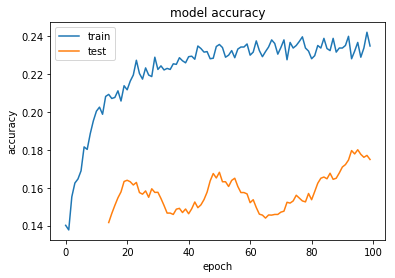

In [181]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(pd.Series(history.history['val_acc']).rolling(15).mean())
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [179]:
type(history)

keras.callbacks.History